In [10]:
import os
import numpy as np
import json
from PIL import Image
import IPython
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy
from scipy.spatial import distance

In [5]:
user_profile = os.environ['HOME']

# set the path to the downloaded data: 
data_path = '%s/data/EE148/RedLights2011_Medium' % user_profile

# get sorted list of files: 
file_names = sorted(os.listdir(data_path)) 

# remove any non-JPEG files: 
file_names = [f for f in file_names if '.jpg' in f] 

In [237]:
def get_ref_red_lights():
    """Get some reference images of red lights from the first image."""
    
    I = Image.open(os.path.join(data_path,file_names[0]))
    I = np.asarray(I)
    tl_row, tl_col, br_row, br_col = top_row, left_col, bot_row, right_col = 154, 316, 171, 323
    show_img(I[top_row:bot_row, left_col:right_col, :], [])
    obj1 = I[top_row:bot_row, left_col:right_col, :]
    tl_row, tl_col, br_row, br_col = top_row, left_col, bot_row, right_col = 180, 67, 205, 79
    show_img(I[top_row:bot_row, left_col:right_col, :], [])
    obj2 = I[top_row:bot_row, left_col:right_col, :]
    tl_row, tl_col, br_row, br_col = top_row, left_col, bot_row, right_col = 192, 419, 207, 428
    show_img(I[top_row:bot_row, left_col:right_col, :], [])
    obj3 = I[top_row:bot_row, left_col:right_col, :]
    ref = [obj1, obj2, obj3]
    return ref

In [257]:
def detect_red_light(I):
    '''
    This function takes a numpy array <I> and returns a list <bounding_boxes>.
    The list <bounding_boxes> should have one element for each red light in the 
    image. Each element of <bounding_boxes> should itself be a list, containing 
    four integers that specify a bounding box: the row and column index of the 
    top left corner and the row and column index of the bottom right corner (in
    that order). See the code below for an example.
    
    Note that PIL loads images in RGB order, so:
    I[:,:,0] is the red channel
    I[:,:,1] is the green channel
    I[:,:,2] is the blue channel
    '''
    
    
    bounding_boxes = [] # This should be a list of lists, each of length 4. See format example below. 
    
    '''
    BEGIN YOUR CODE
    '''
    dists = []
    
    for ref in get_ref_red_lights():
        ref_height, ref_width, _ = ref.shape
        print(ref_height, ref_width)
        box_height = ref_height
        box_width = ref_width

        (n_rows,n_cols,n_channels) = np.shape(I)
        
        for i in range(n_rows - box_height):
            for j in range(n_cols - box_width):
                tl_row = i
                br_row = i + box_height
                tl_col = j
                br_col = j + box_width
                test_box = I[tl_row:br_row, tl_col:br_col, :]
                dist = distance.euclidean((ref - ref).flatten(), (ref - test_box).flatten())
                dists.append(dist)
                if dist < 1000:
                    bounding_boxes.append([tl_row,tl_col,br_row,br_col]) 
    print(len(bounding_boxes))
    plt.hist(dists)
    '''
    END YOUR CODE
    '''
    
    for i in range(len(bounding_boxes)):
        assert len(bounding_boxes[i]) == 4
    
    return bounding_boxes

In [258]:
def show_img(I, rect_list):
    # Create figure and axes
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    # Display the image
    ax.imshow(I)
    for rect in rect_list:
        tl_row, tl_col, br_row, br_col = rect
        # Create a Rectangle patch
        rect = patches.Rectangle((tl_col-1, tl_row-1), br_col-tl_col, br_row-tl_row,
                                 linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.show()

17 7
25 12
15 9
3


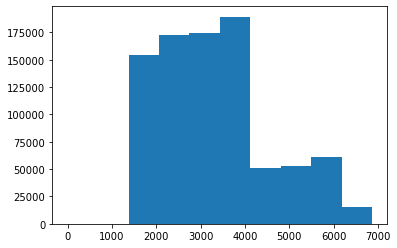

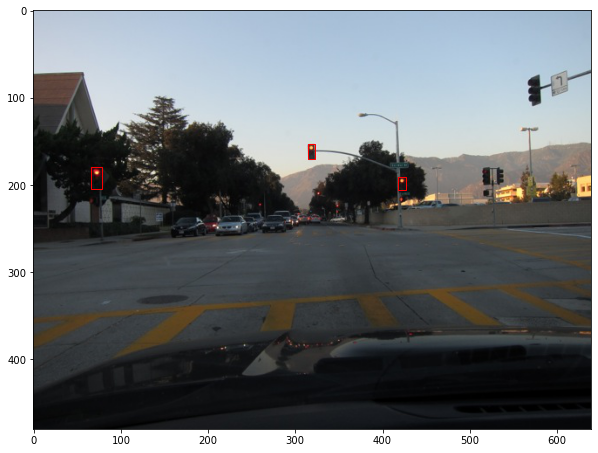

In [259]:
preds = {}
for i in range(len(file_names)):
    
    # read image using PIL:
    I = Image.open(os.path.join(data_path,file_names[i]))

    # convert to numpy array:
    I = np.asarray(I)
    
    preds[file_names[i]] = detect_red_light(I)
    
    show_img(I, preds[file_names[i]])
    break